# Metropolis Algorithm for 2D lattice
Here I will give an example of how to use the files to find the thermodynamic properties of a 2D isling model lattice.

In [1]:
from ma2d import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config_ = {'range': [1, 5.02], 'step': 0.2, 
           'lattice_size': (60,60),
          'temp': 1, 'num_rounds': 9000}

sim = metropolisAlgorithm2d(config_)

In [3]:
sim.run()


After running the simulation the equilibrium times can be found by plottting the energy and magnetization, per spin, against Monte Carlo timesteps and selecting the value where these quanities stabilize.

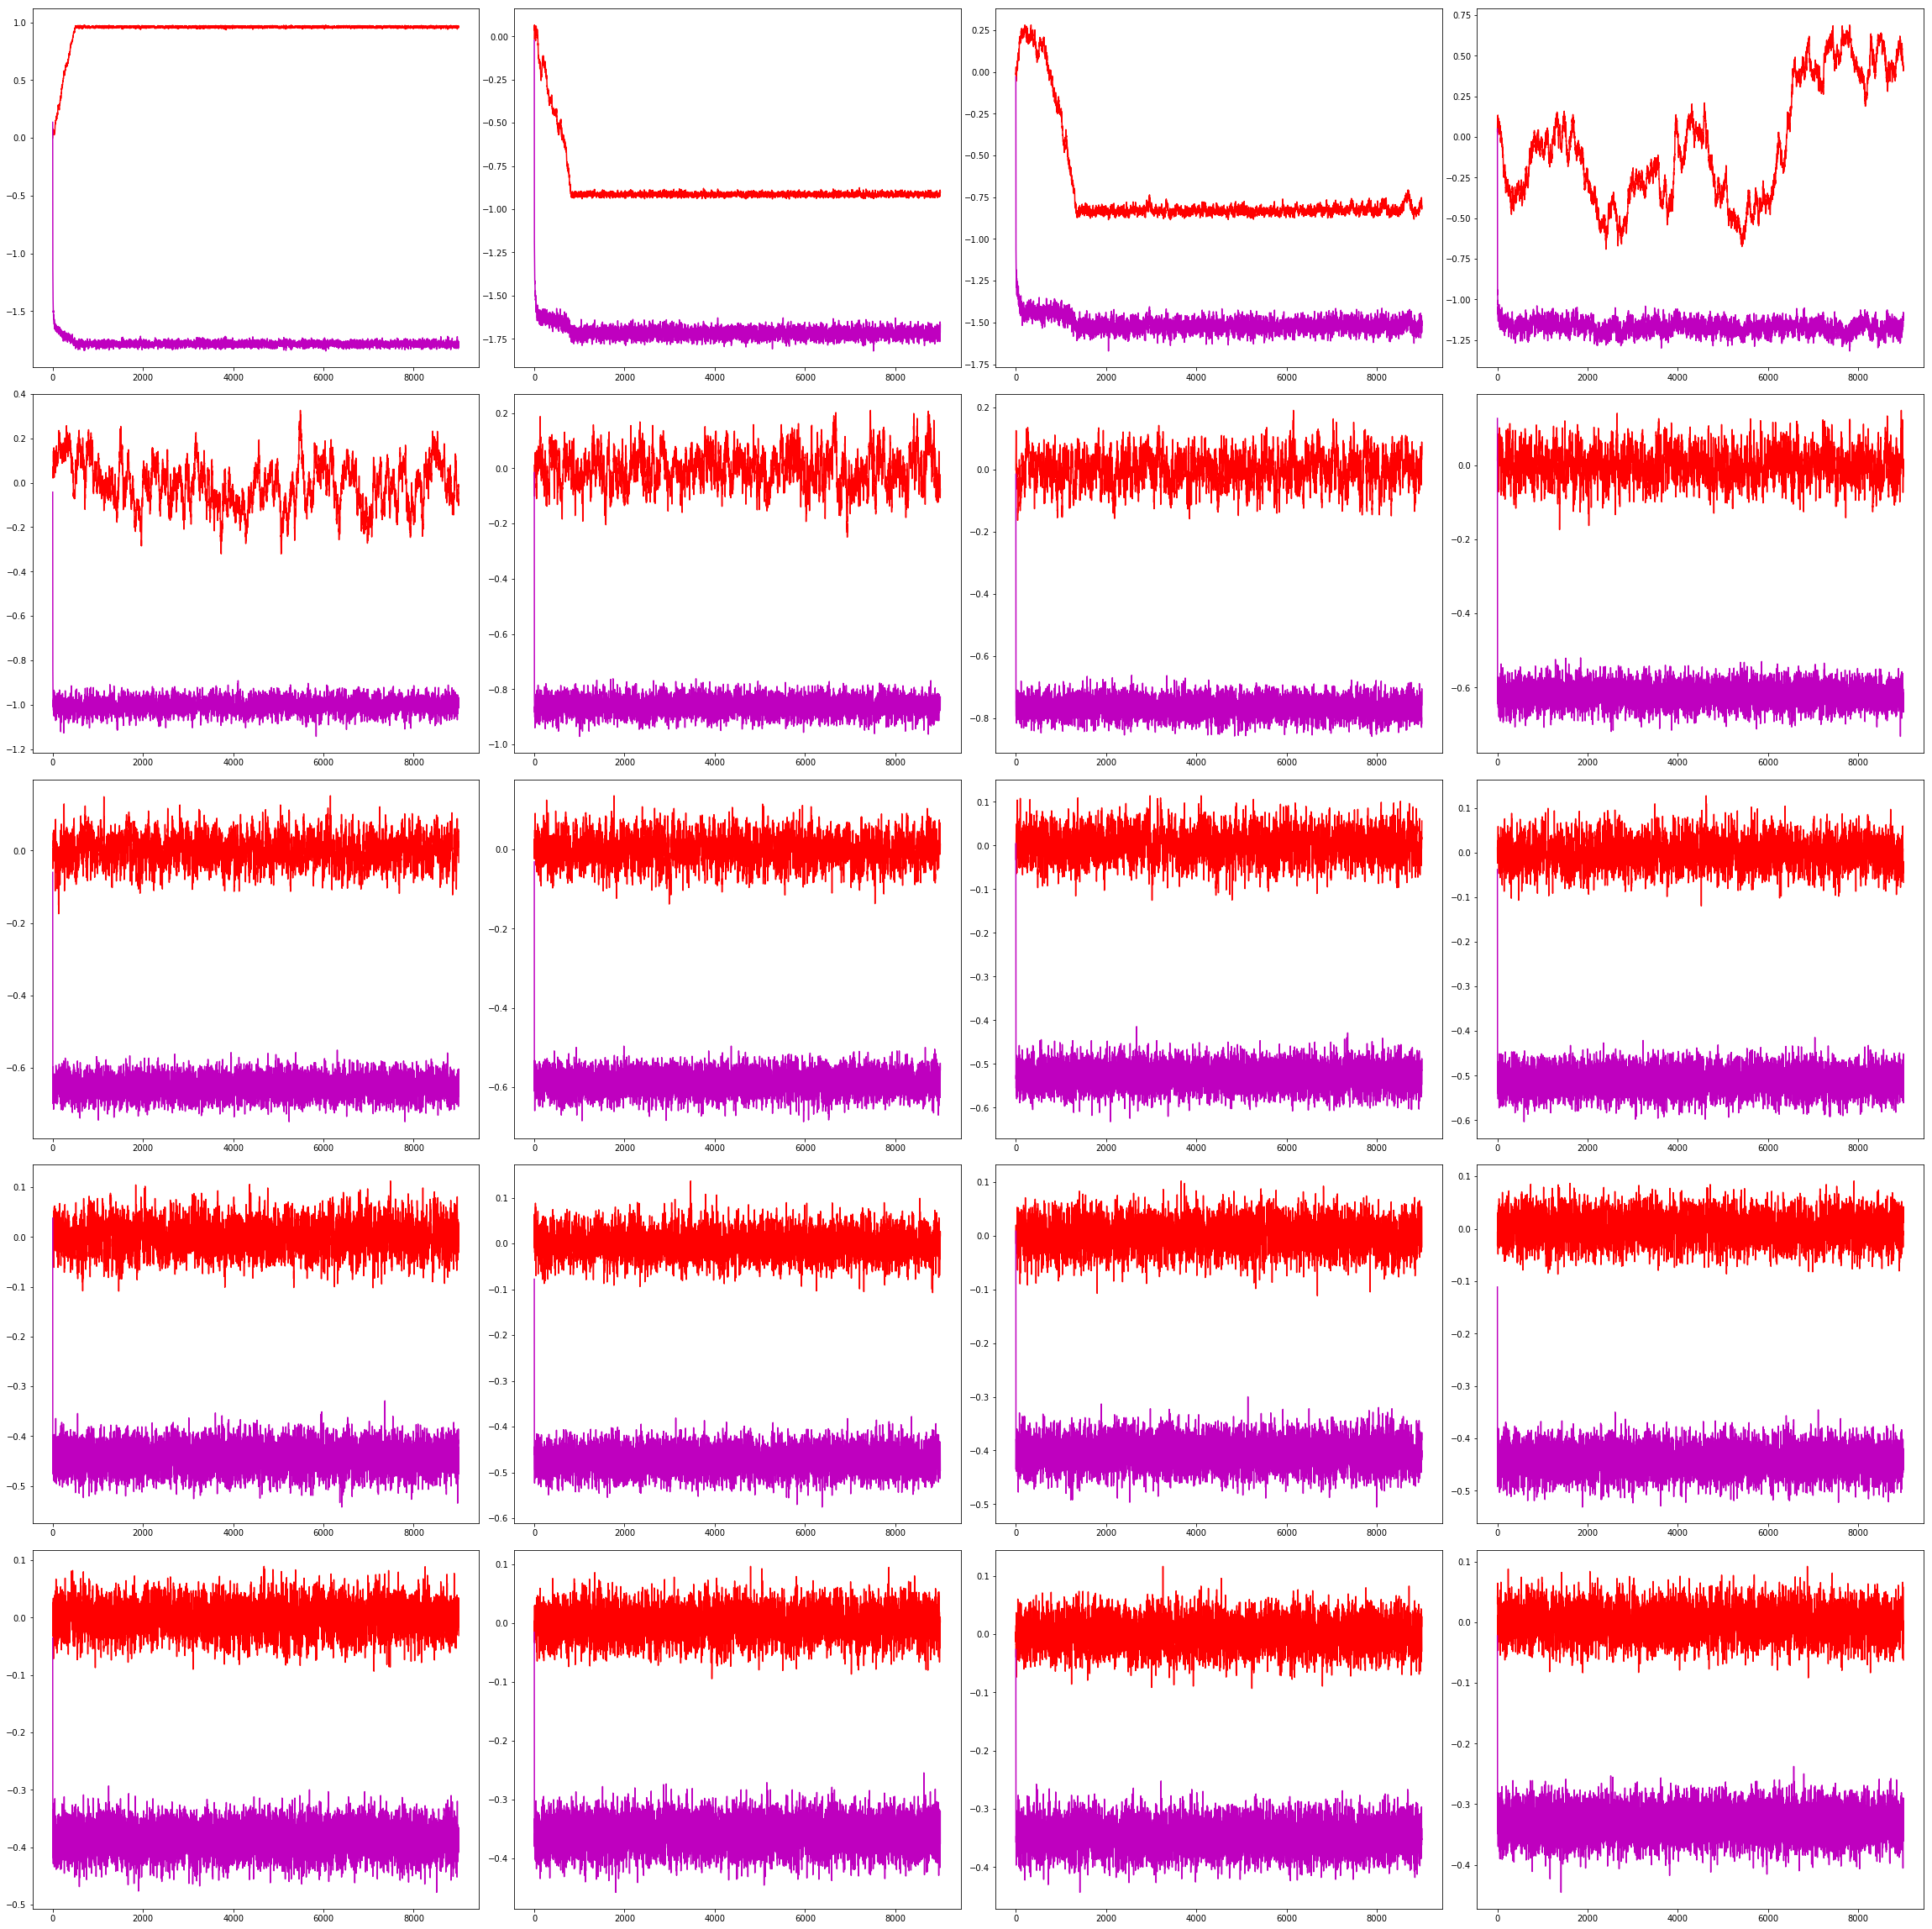

In [6]:
fig, ax = plt.subplots(nrows=5,ncols=4, figsize=(32, 32))
plt.tight_layout()

ax = ax.ravel()

for i in range(20):
    ax[i].plot(sim.final_magnetization[i], 'r')
    ax[i].plot(np.arange(sim.num_rounds), sim.final_energy[i], 'm')
plt.show()

## Correlation Time

In [7]:
sim.equilib_time = [3000 for _ in sim.system]
sim.equilib_time[3] = 7500
sim.correlation_time() 

In [9]:
sim.correlation_times /= 100

In [12]:
s = np.zeros(len(sim.system))
for i in range(len(sim.system)):
    s[i] = sim.beta[i] * two_pnt(np.abs(sim.ind_energy[i])) * 60 ** 2

In [15]:
sh = np.zeros(len(sim.system))
for i in range(len(sim.system)):
    sh[i] = sim.beta[i]**2 * two_pnt(np.abs(sim.ind_mag[i])) /( 60 ** 2)

In [13]:
sim.indep_meausurements()
sim.magnetization_per_site(True)
#spec = sim.specific_heat()
sim.energy_per_spin(True)
#sus_a = sim.suscepitbility()

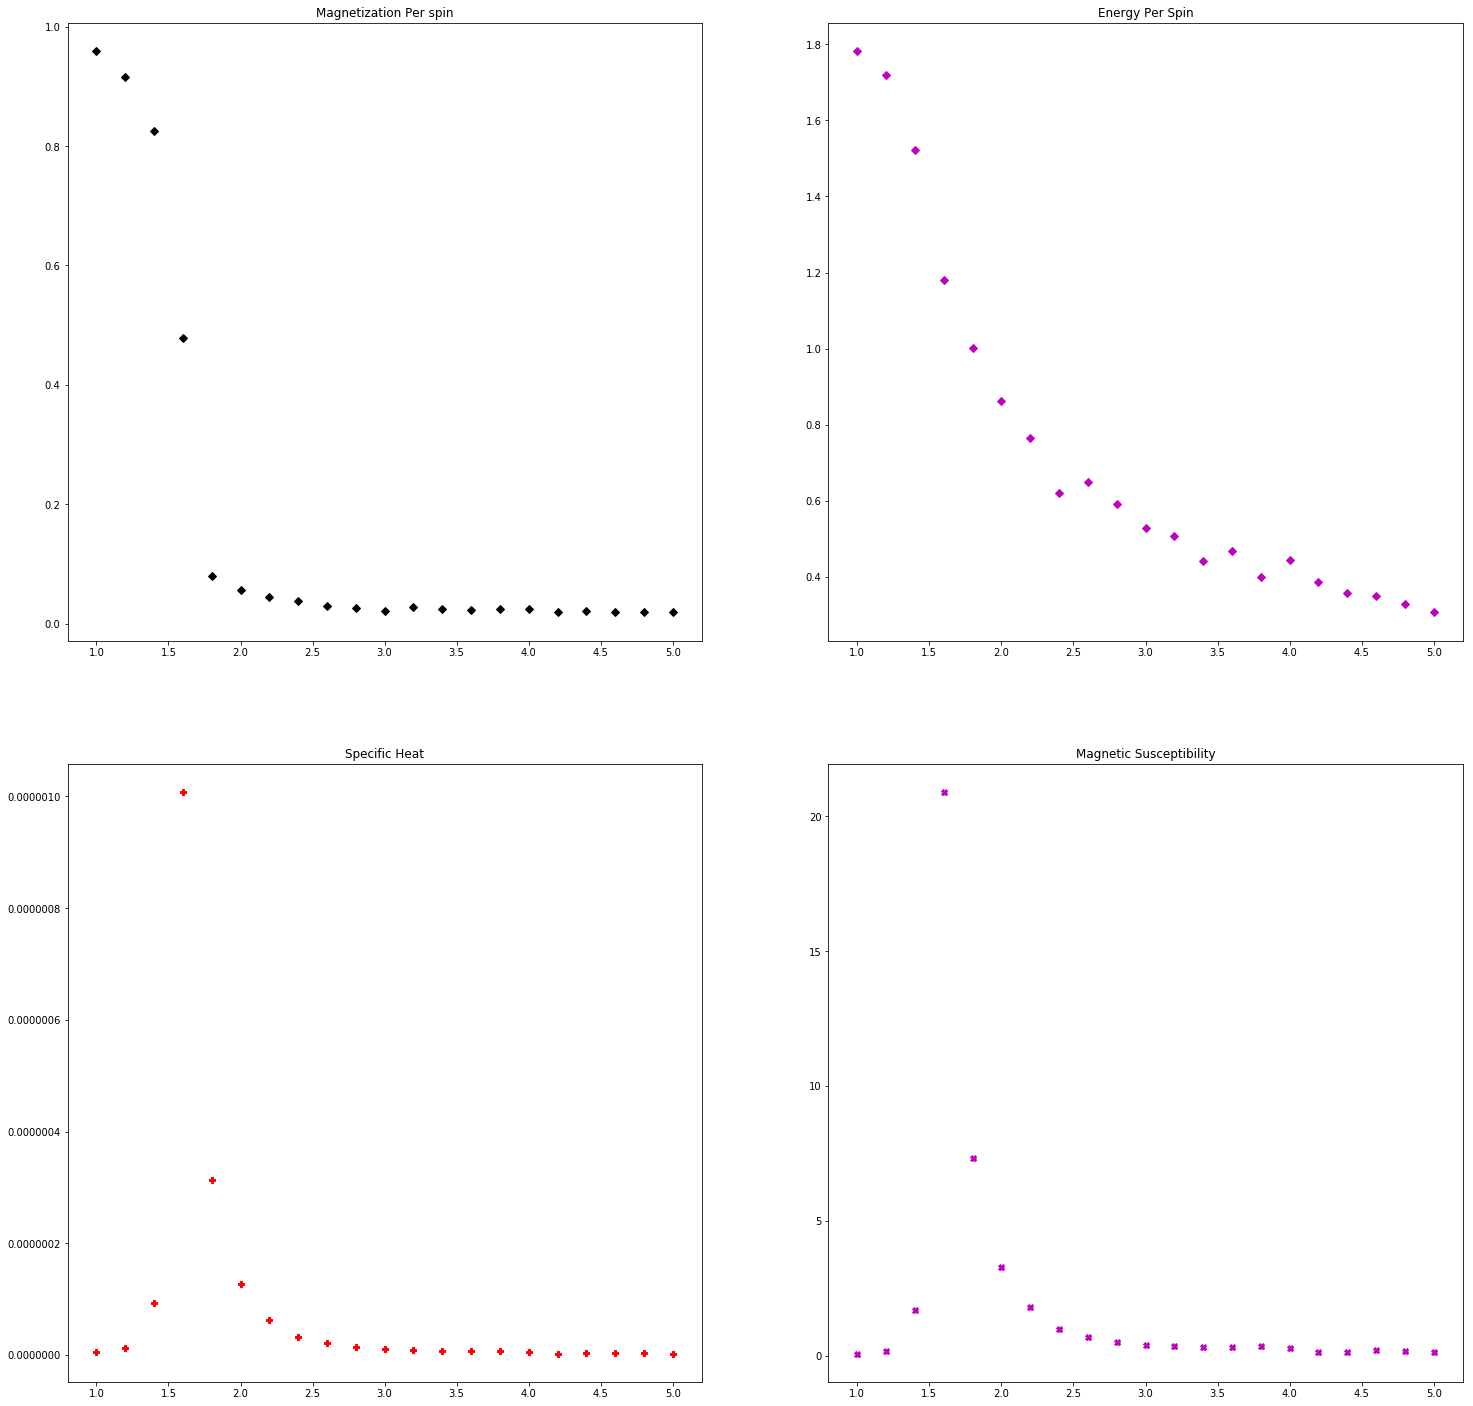

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
#plt.tight_layout()
ax = ax.ravel()

ax[0].plot(sim.temp, sim.mag_spin, 'kD')
ax[0].set_title("Magnetization Per spin")

ax[1].plot(sim.temp, sim.energy_spin, 'mD')
ax[1].set_title("Energy Per Spin")


ax[2].plot(sim.temp, sh, 'rP')
ax[2].set_title("Specific Heat")

ax[3].plot(sim.temp, s, 'mX')
ax[3].set_title("Magnetic Susceptibility")

plt.show()